##  Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4
1,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
2,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
3,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58,23.1
4,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67,17.5


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     493 non-null    float64
 1   ZN       493 non-null    float64
 2   INDUS    493 non-null    float64
 3   CHAS     493 non-null    float64
 4   NOX      493 non-null    float64
 5   RM       493 non-null    float64
 6   AGE      493 non-null    float64
 7   DIS      493 non-null    float64
 8   RAD      493 non-null    float64
 9   TAX      493 non-null    float64
 10  PTRATIO  493 non-null    float64
 11  B        493 non-null    float64
 12  LSTAT    493 non-null    float64
 13  MEDV     493 non-null    float64
dtypes: float64(14)
memory usage: 54.2 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0.0    458
1.0     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,3.706289,11.449290,11.272069,0.070994,0.556101,6.282302,68.499391,3.744161,9.701826,411.653144,18.509331,355.697809,12.662840,22.478702
std,8.695156,23.598338,6.886442,0.257076,0.116960,0.707509,28.347100,2.106737,8.766989,169.291600,2.152856,92.290142,7.124376,9.248121
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082650,0.000000,5.190000,0.000000,0.448000,5.880000,43.700000,2.078800,4.000000,280.000000,17.400000,374.710000,7.120000,16.800000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.208000,77.700000,3.099300,5.000000,335.000000,19.100000,391.270000,11.340000,21.100000
75%,3.774980,12.500000,18.100000,0.000000,0.631000,6.625000,94.100000,5.100400,24.000000,666.000000,20.200000,396.210000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

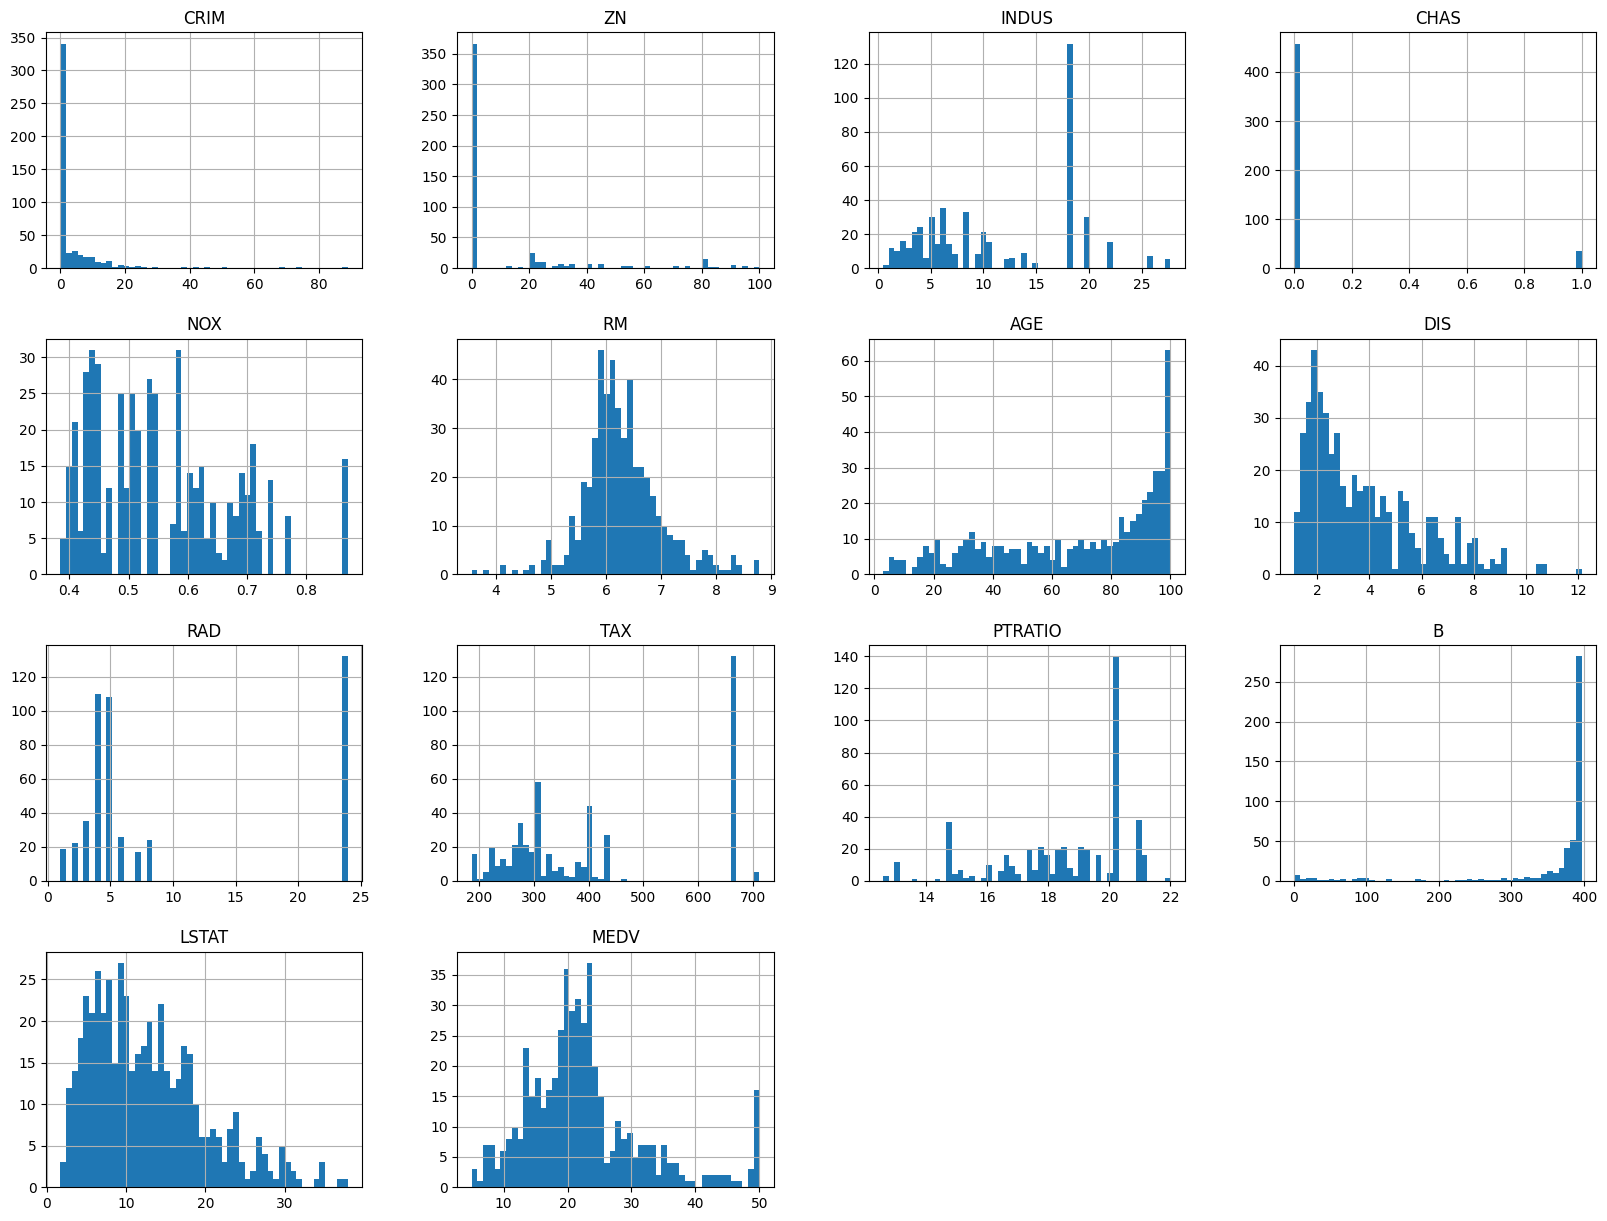

In [8]:
# for plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## Train-test Splitting

In [9]:
# For learning purpose
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42) # it is used to fix the values of train & test set
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices =shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 395
Rows in test set: 99



In [13]:
housing=housing.dropna()

In [14]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4
1,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
2,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
3,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58,23.1
4,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
489,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
490,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
491,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set['CHAS'].value_counts()

CHAS
0.0    92
1.0     7
Name: count, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

CHAS
0.0    366
1.0     28
Name: count, dtype: int64

In [18]:
# 92/7

In [19]:
# 366/28

In [20]:
housing = strat_train_set.copy()

## Looking for Correlations

In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679077
ZN         0.380062
B          0.341030
DIS        0.246102
CHAS       0.171493
AGE       -0.344026
CRIM      -0.376244
RAD       -0.378787
NOX       -0.408277
TAX       -0.446904
INDUS     -0.458215
PTRATIO   -0.532502
LSTAT     -0.739733
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

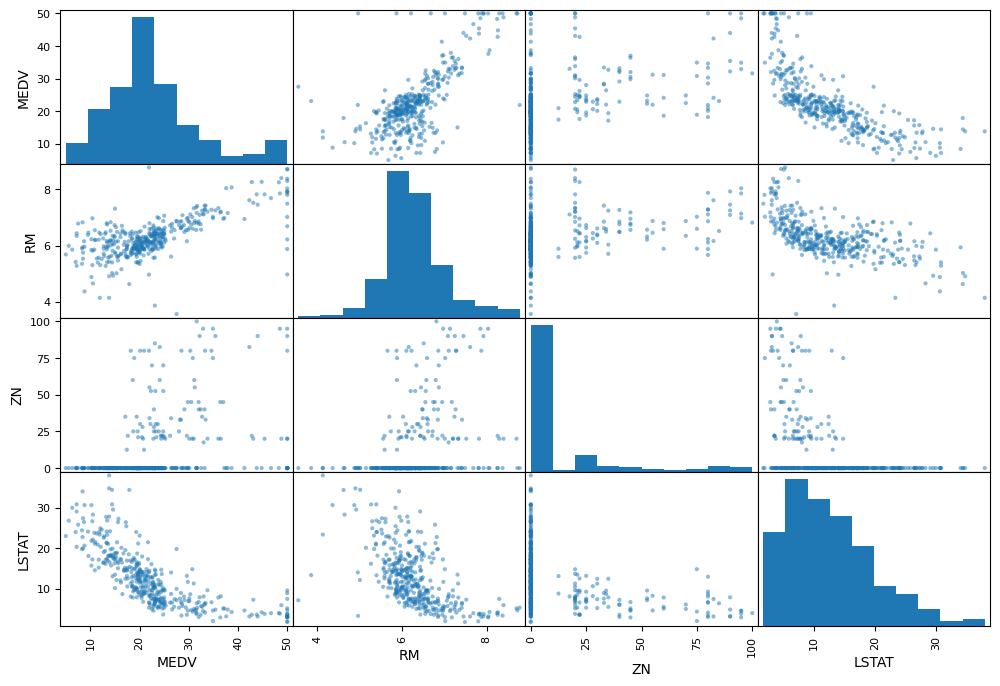

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM", "ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

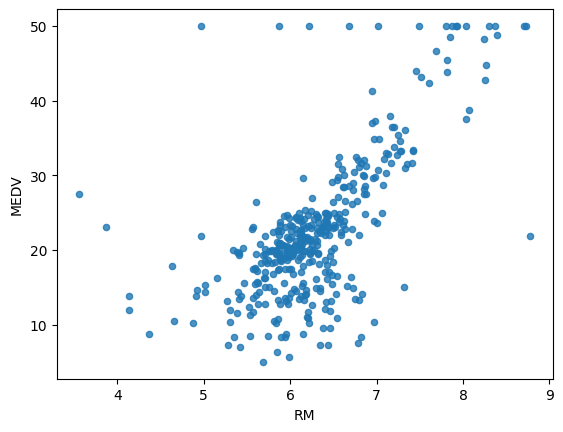

In [23]:
housing.plot(kind= "scatter", x= "RM", y="MEDV", alpha=0.8) # alpha is used to show plot as lighter or brighter

## Trying out Attribute combination

In [24]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
160,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6,46.134663
199,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03,22.4,47.701050
277,0.03502,80.0,4.95,0.0,0.411,6.861,27.9,5.1167,4.0,245.0,19.2,396.90,3.33,28.5,35.709080
184,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61,30.3,46.292388
441,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9,98.989298


In [26]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679077
ZN         0.380062
B          0.341030
DIS        0.246102
CHAS       0.171493
AGE       -0.344026
CRIM      -0.376244
RAD       -0.378787
NOX       -0.408277
TAX       -0.446904
INDUS     -0.458215
TAXRM     -0.513253
PTRATIO   -0.532502
LSTAT     -0.739733
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

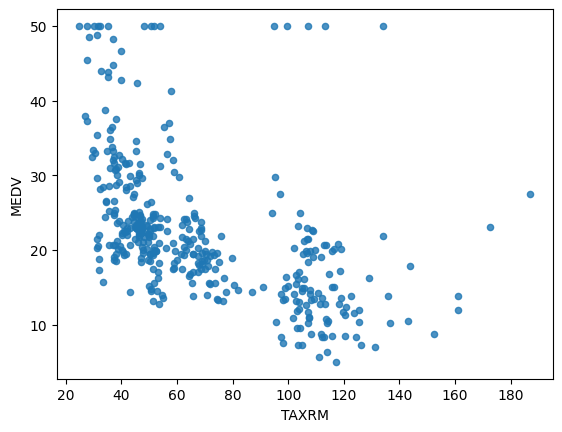

In [27]:
housing.plot(kind= "scatter", x= "TAXRM", y="MEDV", alpha=0.8)

In [28]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [29]:
# To take care of missing attributes, you have three options:
#    1. Get rid of the missing data points
#   2. Get rid of the whole attributes
#   3. Set the value to some value(0, mean or median)

In [30]:
  housing.describe()  #before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.839469,10.789340,11.471421,0.071066,0.559929,6.286431,69.295431,3.656475,9.845178,415.109137,18.481472,352.404036,12.623782
std,9.005509,23.201656,6.963892,0.257262,0.117836,0.715813,28.213652,2.052204,8.875382,169.447540,2.201997,97.811288,7.042425
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.085013,0.000000,5.190000,0.000000,0.449000,5.884250,45.925000,2.005175,4.000000,281.750000,17.400000,374.462500,7.152500
50%,0.330960,0.000000,9.900000,0.000000,0.538000,6.205000,78.500000,3.057250,5.000000,348.000000,19.100000,391.250000,11.430000
75%,4.251580,0.000000,18.100000,0.000000,0.643000,6.594500,94.475000,4.770675,24.000000,666.000000,20.200000,396.042500,16.635000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([3.30960e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20500e+00, 7.85000e+01, 3.05725e+00, 5.00000e+00, 3.48000e+02,
       1.91000e+01, 3.91250e+02, 1.14300e+01])

In [33]:
X = imputer.transform(housing)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing.columns)  # tr means transformed data set

In [35]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.839469,10.789340,11.471421,0.071066,0.559929,6.286431,69.295431,3.656475,9.845178,415.109137,18.481472,352.404036,12.623782
std,9.005509,23.201656,6.963892,0.257262,0.117836,0.715813,28.213652,2.052204,8.875382,169.447540,2.201997,97.811288,7.042425
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.085013,0.000000,5.190000,0.000000,0.449000,5.884250,45.925000,2.005175,4.000000,281.750000,17.400000,374.462500,7.152500
50%,0.330960,0.000000,9.900000,0.000000,0.538000,6.205000,78.500000,3.057250,5.000000,348.000000,19.100000,391.250000,11.430000
75%,4.251580,0.000000,18.100000,0.000000,0.643000,6.594500,94.475000,4.770675,24.000000,666.000000,20.200000,396.042500,16.635000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-learn Design

Primarily three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer
It has a fit method and transform method. Fit method - fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a
convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. 
It also gives score function which will evaluate the predictins.

## Feature Scaling

Primarily two types of feature scaling methods:
1. Min-max scaling
      (value - min)/(max - min)
      Sklearn provides a class called MinMaxScaler for this
      
2. Standarization
      (value - mean)/std
      Sklearn provides a class called StandardScaler for this
      
      

## Creating a Pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #........add as many as you wanr in your pipeline
    ('std_scaler', StandardScaler()),
])


In [37]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [38]:
housing_num_tr   # It is a numpy array

array([[-0.41668429, -0.46561583, -1.06705516, ..., -0.85552537,
         0.44116339, -0.50953166],
       [-0.40274066, -0.46561583, -0.12673114, ...,  0.05389591,
         0.39448373,  0.4842862 ],
       [-0.42299511,  2.98679796, -0.93765277, ...,  0.32672229,
         0.45549486, -1.32136285],
       ...,
       [ 0.10814466, -0.46561583,  0.9530599 , ...,  0.78143293,
        -0.99474805,  0.53973527],
       [-0.41774832,  0.48379796, -0.80681258, ...,  0.28125123,
         0.3448354 , -1.29292743],
       [ 0.07965256, -0.46561583,  0.9530599 , ...,  0.78143293,
         0.02350326, -0.78251167]])

In [39]:
housing_num_tr.shape

(394, 13)

## Selecting a desired model for Dragon Real Estates

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [41]:
some_data = housing.iloc[:5]

In [42]:
some_labels= housing_labels.iloc[:5]

In [43]:
prepared_data = my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([23.146, 21.284, 29.679, 31.685, 14.418])

In [45]:
list(some_labels)

[23.6, 22.4, 28.5, 30.3, 14.9]

## Evaluating the model

In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)   #lin mse is linear mean sq error
rmse = np.sqrt(mse)

In [47]:
rmse

1.2543733788645466

## Using better evaluation technique - Cross Validation

In [48]:
# 1 2 3 4 5 6 7 8 9 10 Suppose these are data sets
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)



In [49]:
rmse_scores 

array([2.4272424 , 1.97498006, 2.88308409, 3.29710509, 4.00694706,
       2.27150259, 4.94986457, 3.09591801, 5.47936665, 2.68921404])

In [50]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    

In [51]:
print_scores(rmse_scores)

Scores: [2.4272424  1.97498006 2.88308409 3.29710509 4.00694706 2.27150259
 4.94986457 3.09591801 5.47936665 2.68921404]
Mean: 3.307522455630617
Standard deviation: 1.1015728387287211


## Saving the model

In [52]:
from joblib import dump, load   # For creation of Model
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [53]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [54]:
final_rmse

3.100094244250055

In [55]:
# To calculate the accuracy
from sklearn.metrics import r2_score
final_predictions = model.predict(X_test_prepared)
r2_score(Y_test,final_predictions)

0.8623405800624193

In [56]:
prepared_data  # Printing the prepared data

array([[-4.16684288e-01, -4.65615832e-01, -1.06705516e+00,
        -2.76591273e-01, -4.24255666e-01,  1.81239161e-01,
         5.25397843e-01, -4.92864831e-01, -5.46606114e-01,
        -7.03820066e-01, -8.55525374e-01,  4.41163387e-01,
        -5.09531660e-01],
       [-4.02740661e-01, -4.65615832e-01, -1.26731137e-01,
         3.61544307e+00, -6.02696667e-01, -6.70623947e-01,
        -5.49915809e-01, -1.89055254e-03, -6.59420576e-01,
        -8.16091732e-01,  5.38959058e-02,  3.94483725e-01,
         4.84286205e-01],
       [-4.22995110e-01,  2.98679796e+00, -9.37652767e-01,
        -2.76591273e-01, -1.26547753e+00,  8.03700708e-01,
        -1.46907830e+00,  7.12444577e-01, -6.59420576e-01,
        -1.00518085e+00,  3.26722290e-01,  4.55494862e-01,
        -1.32136285e+00],
       [-4.21700925e-01,  2.98679796e+00, -1.43081965e+00,
        -2.76591273e-01, -1.32495786e+00,  1.14780305e+00,
        -1.16032488e+00,  1.78206885e+00, -8.85049501e-01,
        -5.08821909e-01, -2.67436793e

In [57]:
prepared_data[0]

array([-0.41668429, -0.46561583, -1.06705516, -0.27659127, -0.42425567,
        0.18123916,  0.52539784, -0.49286483, -0.54660611, -0.70382007,
       -0.85552537,  0.44116339, -0.50953166])

## Using the model

In [58]:
from joblib import dump, load
import numpy as np
model = load( 'Dragon.joblib') 

features = np.array([[-0.41668429, -0.46561583, -1.06705516, -0.27659127, -0.42425567,
        0.18123916,  0.52539784, -0.49286483, -0.54660611, -0.70382007,
       -0.85552537,  0.44116339, -0.50953166]])
model.predict(features)

array([23.146])